## 1. 투표기반 분류기

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
X,y=make_moons(n_samples=500, noise=0.3, random_state=42)

In [7]:
X.shape, y.shape

((500, 2), (500,))

In [11]:
X[:,0]
X[:,1]

array([-0.25874875,  0.92038714, -0.45552558,  1.08628844,  1.50942444,
       -0.55117606, -0.15862989,  1.31817168,  0.49607493, -0.45980435,
       -0.01569994,  0.25219294, -0.7164187 ,  0.62486933, -0.51105069,
       -0.54069686,  0.29779005,  0.5179118 , -0.80209911, -0.25361127,
        0.22237528,  0.46793015,  0.23938905, -0.21552359,  0.41594634,
        1.01491329,  0.22194847,  0.42392467,  1.56378251, -0.37654889,
       -0.03961892, -0.30353056, -0.05615094,  0.84336766,  0.38027569,
       -0.77306105, -0.38304892,  0.84400584,  0.62105408,  0.96162325,
       -0.77914243,  0.81659756,  0.5738688 ,  0.15981211, -0.04316216,
        0.96722336,  0.16080796,  0.47834272, -0.79825322,  0.260445  ,
        1.13134609,  0.92791687,  1.08219171, -0.33619758,  0.48235382,
        1.09730924,  1.01921527,  0.15470144,  0.39039385,  1.30952481,
        0.174434  ,  0.11781406, -0.31106856, -0.18068443,  1.04359771,
        0.66710754, -0.02393825,  0.60521267,  0.00411171, -0.48

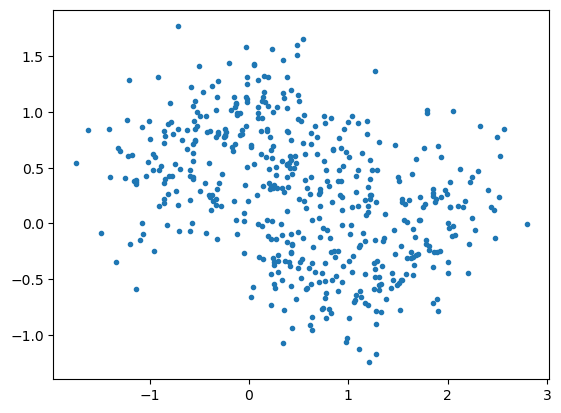

In [13]:
plt.plot(X[:,0],X[:,1],'.')

Text(0, 0.5, 'X2')

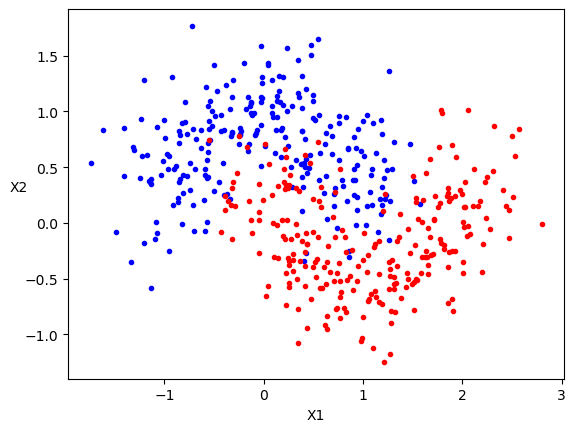

In [20]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'b.') #정답이 0인 경우
plt.plot(X[:,0][y==1],X[:,1][y==1],'r.') #정답이 1인 경우
plt.xlabel('X1')
plt.ylabel('X2',rotation=0)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

### 1.1 하드보팅

In [100]:
log_clf=LogisticRegression(random_state=42)
rnd_clf=RandomForestClassifier(random_state=42)
svm_clf=SVC(random_state=42)

voting_clf= VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svm',svm_clf)],voting='hard')


In [101]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(random_state=42))])

In [102]:
y_pred=voting_clf.predict(X_test)

In [103]:
(y_test==y_pred).sum()

114

In [104]:
len(y_test)

125

In [105]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.912

In [113]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf) :
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__,accuracy_score(y_test,y_pred))

<class 'sklearn.linear_model._logistic.LogisticRegression'> 0.864
<class 'sklearn.ensemble._forest.RandomForestClassifier'> 0.896
<class 'sklearn.svm._classes.SVC'> 0.896
<class 'sklearn.ensemble._voting.VotingClassifier'> 0.912


### 1.2 소프트보팅

In [114]:
log_clf=LogisticRegression(random_state=42)
rnd_clf=RandomForestClassifier(random_state=42)
svm_clf=SVC(probability=True,random_state=42)

voting_clf= VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svm',svm_clf)],voting='soft')


In [115]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf) :
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__,accuracy_score(y_test,y_pred))

<class 'sklearn.linear_model._logistic.LogisticRegression'> 0.864
<class 'sklearn.ensemble._forest.RandomForestClassifier'> 0.896
<class 'sklearn.svm._classes.SVC'> 0.896
<class 'sklearn.ensemble._voting.VotingClassifier'> 0.92


## 2. 배깅 앙상블

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [128]:
bag_clf= BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                          max_samples=100,bootstrap=True,
                          )
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500)

In [129]:
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.92

In [127]:
tree_clf= DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train) 
y_pred=tree_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.856

### oob 평가

In [130]:
bag_clf= BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                          max_samples=100,bootstrap=True,oob_score=True,n_jobs=-1,random_state=42
                          )
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [132]:
bag_clf.oob_score_

0.9253333333333333

### 랜덤포레스트 모델

In [133]:
bag_clf= BaggingClassifier(
            DecisionTreeClassifier(max_leaf_nodes=16,random_state=42),n_estimators=500,
            bootstrap=True,oob_score=True,random_state=42,n_jobs=-1

)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

In [134]:
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,random_state=42,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred=rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

In [135]:
rnd_clf.feature_importances_

array([0.42253629, 0.57746371])